<h1 align="center"> Data Exploration on Amazon Bestselling Books </b> </h1><br>

### Abstract

### Data Source
##### Overview of data source used in this notebook

This .csv dataset contains 550 observations or instances with a mixed of between categorical and numerical attributes distributed into 7 features

The data source can be viewed on Kaggle in the folling [LINK](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)

### Breakdown of this notebook

### 1. Importing Libraries

In [41]:
# Importing required libraries for the analysis and visualisation of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
%matplotlib inline

In [2]:
# Ignoring messages involved with packages
import warnings
warnings.filterwarnings("ignore")

### 2. Acquiring and Loading the Dataset

In [3]:
# Utilising pandas library and "read_csv" function to read the Amazon Top 50 Bestselling Books file downloaded from Kaggle.
bestsellers = pd.read_csv("bestsellers with categories.csv")

# Examining first 5 instances of the Airbnb file
bestsellers.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
# Checking amount of rows/instances in the dataset to understand the size of data that are working with
len(bestsellers)

550

As there's only 550, have not considered duplicated instances, this dataset is seemed to be a small dataset

In [5]:
# Checking data type of every column/feature in the dataset
bestsellers.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

### 3. Data Cleaning, Wrangling and Understanding

Through examining first 5 instances in the dataset, none contains missing or null values in columns of features. However, examining missing values is still required for data integrity before continuing with analysis.

In [6]:
# Examining which columns contain null values
# "sum" function supports the finding of total missing values in each column in the dataset.
bestsellers.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

As there is no missing values in the dataset, there would no need for further handling values in columns of feature. 
<br>

Now, it's turn to taking for duplicate instances. However, before checking for duplicated instances, should create a dataframe that only contain columns of categorical or object dtype for more accurate inspection.

In [7]:
# Create a list of columns that it's dtype is not numeric
columns_without_numeric_data = list(bestsellers.select_dtypes(exclude=("int", "float")).columns)
print(f'Columns without numeric data: {", ".join(columns_without_numeric_data)}')

Columns without numeric data: Name, Author, Genre


In [8]:
# Checking for duplications in the columns
for col in columns_without_numeric_data:
    if bestsellers[col].duplicated().any() == True:
        print(f'Column {col} contains duplicates.')
    else:
        print(f'Column {col} does not contain duplicates.')

Column Name contains duplicates.
Column Author contains duplicates.
Column Genre contains duplicates.


Interestingly, all three columns of categorical or objective data contain duplicate values.

As the result, further exploration on these features is needed. First, let's explore instances contains words in different case and extra spaces.

In [9]:
# Checking spelling errors in those defined features.
for column in columns_without_numeric_data:
    print(f'Before {column}: {len(set(bestsellers[column]))} - After {column}: {len(set(bestsellers[column].str.title().str.strip()))}')

Before Name: 351 - After Name: 350
Before Author: 248 - After Author: 248
Before Genre: 2 - After Genre: 2


As observed, there were typing erroes in the Name column of the book.

In [10]:
# Correcting typing errors in the main dataset
bestsellers["Name"] = bestsellers["Name"].str.title().str.strip()

In [11]:
# Checking the changes and for correct typing
for column in columns_without_numeric_data:
    print(f'Before {column}: {len(set(bestsellers[column]))} -  After {col}: {len(set(bestsellers[column].str.title().str.strip()))}')

Before Name: 350 -  After Genre: 350
Before Author: 248 -  After Genre: 248
Before Genre: 2 -  After Genre: 2


Books' name is now corrected from spelling errors and free from duplication. Next, checking if there are same author names but with different spellings.

In [12]:
# Checking the Author's name for different spellings
bestsellers["Author"].sort_values().unique()

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

There have been spotted that George R.R. Martin - George R. R. Martin and J.K. Rowling - J. K. Rowling have different spellings although they are the same authors

In [19]:
# Checking the most similar spellings
import fuzzywuzzy
from fuzzywuzzy import process
matches_author_name = fuzzywuzzy.process.extract('George. R.R. Martin',
                                                 bestsellers["Author"].sort_values().unique(),
                                                 limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_author_name

[('George R. R. Martin', 100),
 ('George R.R. Martin', 100),
 ('George Orwell', 53),
 ('Bill Martin Jr.', 52),
 ('Mark R. Levin', 48)]

In [20]:
# Replace the names of the authors with the correct ones
bestsellers = bestsellers.replace('George R. R. Martin', 'George R.R. Martin')
bestsellers = bestsellers.replace("J. K. Rowling", "J.K. Rowling")

In [21]:
# Checking again if the name is replaced correctly and there is no inconsistent format
for column in columns_without_numeric_data:
    print(f'Before {column}: {len(set(bestsellers[column]))} - After {column}: {len(set(bestsellers[column].str.title().str.strip()))}')

Before Name: 350 - After Name: 350
Before Author: 246 - After Author: 246
Before Genre: 2 - After Genre: 2


In [22]:
# Checking for Genre features
bestsellers["Genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [26]:
# Checking with Year to see if there is typing errors
sorted(list(bestsellers["Year"].unique()))

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

Things are seemed to be fine with Genre and Year. Let's us re-check the dataframe to ensure everything is consistent.

In [27]:
# Let's display the dataframe
bestsellers

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Eventhough duplicated instances have been handled through processing Books' name and Athour, but still, there are duplications with different years, which would create skewer of data. 

A new dataframe that not contain the year would be created for better analysis.

In [32]:
bestsellers_without_year = bestsellers.drop(["Year"], axis=1)

In [39]:
# Then, remove duplicates and check how many instances are left in the data
bestsellers_without_year = bestsellers_without_year.drop_duplicates(keep="first")
bestsellers_without_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         361 non-null    object 
 1   Author       361 non-null    object 
 2   User Rating  361 non-null    float64
 3   Reviews      361 non-null    int64  
 4   Price        361 non-null    int64  
 5   Genre        361 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 19.7+ KB


After dropping the "Year" feature and duplicated instances, the dataframe still contains 11 more books titles than actual unique value count above.
<br>
In the next snippet, the reason behind duplication would be again explored.

In [44]:
title_count = collections.Counter(bestsellers_without_year["Name"].tolist())
for title in title_count.most_common(20):
    print(title)

('The Help', 3)
('Gone Girl', 2)
("Quiet: The Power Of Introverts In A World That Can'T Stop Talking", 2)
('The 5 Love Languages: The Secret To Love That Lasts', 2)
('The 7 Habits Of Highly Effective People: Powerful Lessons In Personal Change', 2)
('The Fault In Our Stars', 2)
('The Girl On The Train', 2)
('The Immortal Life Of Henrietta Lacks', 2)
('To Kill A Mockingbird', 2)
('Unbroken: A World War Ii Story Of Survival, Resilience, And Redemption', 2)
('10-Day Green Smoothie Cleanse', 1)
('11/22/63: A Novel', 1)
('12 Rules For Life: An Antidote To Chaos', 1)
('1984 (Signet Classics)', 1)
('5,000 Awesome Facts (About Everything!) (National Geographic Kids)', 1)
('A Dance With Dragons (A Song Of Ice And Fire)', 1)
('A Game Of Thrones / A Clash Of Kings / A Storm Of Swords / A Feast Of Crows / A Dance With Dragons', 1)
('A Gentleman In Moscow: A Novel', 1)
('A Higher Loyalty: Truth, Lies, And Leadership', 1)
('A Man Called Ove: A Novel', 1)


As the list has shown, there are some book titles appear more than one times.

In [45]:
# Display and exploring the duplication of a book title
bestsellers_without_year[bestsellers_without_year["Name"] == "The Help"]

,Name,Author,User Rating,Reviews,Price,Genre
402,The Help,Kathryn Stockett,4.8,13871,6,Fiction
404,The Help,Kathryn Stockett,4.8,13871,8,Fiction
405,The Help,Kathryn Stockett,4.8,13871,7,Fiction


Instances are duplicated by price. In different years, book's price would cost different with the adjustment to inflation as logic or depend by demand. Last entries would be removed from the dataframe in the next snippet.

In [47]:
# Dropping duplication by price
bestsellers_without_year = bestsellers_without_year.drop_duplicates(subset="Name", keep="last")
bestsellers_without_year

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
538,Winter Of The World: Book Two Of The Century T...,Ken Follett,4.5,10760,15,Fiction
539,Women Food And God: An Unexpected Path To Almo...,Geneen Roth,4.2,1302,11,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,Fiction
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction


### 4. Exploring and Visualising Data
##### Exploring data through visualising features' values and correlation between different features and visual analytics
##### This section includes the explanation of the process and the results

As the dataframe is cleared from duplicated instances and any missing values. The bestselling books data is explored in this section to answer follwing question:
* Which author receive highest average rating with their books
* Which author has written the most bestsellers
* Which genres is often a bestsellers
* Which book has the most reviews

However, before answering those questions, the data would be explored first from left to right of the dataset's features to ensure each feature is explored.

This approach would be effective when exploring larger dataset with numerous attributes and allow remembering which feature was explored individually to ensure obtaining much knowledge from the dataset as possible.

In [86]:
# Setting figure configuration for the visualisation
sns.set(rc={'figure.figsize': (30,8)})
sns.set_style("white")

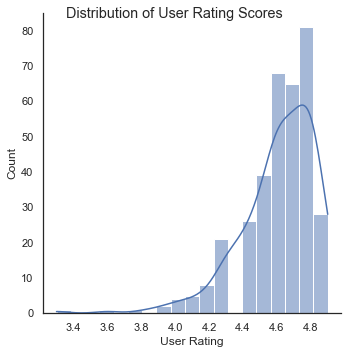

In [95]:
# Utilising distribution plot to visualise the distribution of user rating in the dataset
viz_1 = sns.displot(data=bestsellers_without_year, x="User Rating", kde=True)
viz_1.fig.suptitle("Distribution of User Rating Scores")
plt.show()

From the first visualisation, we can observe that most of the bestselling books received around 4.6 to 4.8 user rating scores.

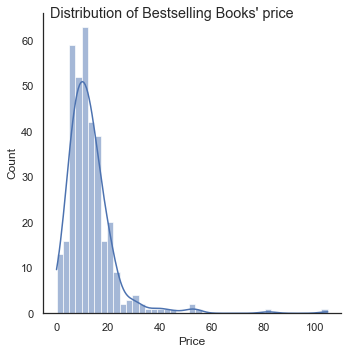

In [99]:
# Examining the distribution of price for bestselling books
viz_2 = sns.displot(data=bestsellers_without_year, x="Price", kde=True)
viz_2.fig.suptitle("Distribution of Bestselling Books' price ")
plt.show()

With bestselling books, the price it takes to obtain a book is around 5-15 dollar. This can be considered as a relatively inexpensive price tag for such a book that would bring in much values.

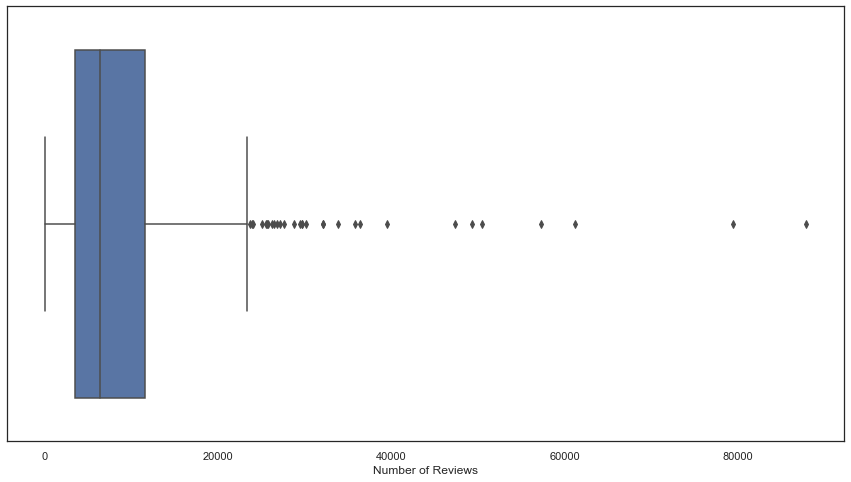

In [150]:
# Examining the distribution of number of reviews
plt.figure(figsize=(15,8))
viz_3 = sns.boxplot(x=bestsellers_without_year["Reviews"])
viz_3.set(xlabel="Number of Reviews")
plt.show()

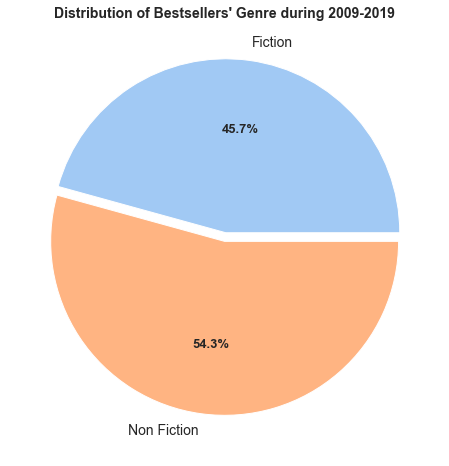

In [151]:
# Next, examining the distribution of published Genre during the period of 2009 to 2019
books_by_genre = bestsellers_without_year.groupby("Genre")[["Name"]].count().reset_index()
viz_4, ax = plt.subplots()
_, texts, autotexts = ax.pie(x=books_by_genre["Name"], labels=books_by_genre["Genre"], 
                             explode=[0.05, 0], autopct="%1.1f%%", 
                             colors=sns.color_palette("pastel"))
plt.setp(autotexts, size=13, weight="bold")
plt.setp(texts, size=14)
ax.set_title("Distribution of Bestsellers' Genre during 2009-2019", size=14, weight="bold")
plt.show()

From the fourth visualisation, non-fiction books is more likely to become a bestsellers where it offers different perspectives from characters in the books as the assumptions.

This visualisation also answer the question on which genre often becomes the bestsellers

In [48]:
# Let's explore which author receive highest average rating with their books

# To explore and answer the question, a new Series is created with associated data
top_10_author = bestsellers_without_year.groupby("Author")[["User Rating"]].mean()\
                .sort_values("User Rating", ascending=False).head(10).reset_index()

top_10_author

,Author,User Rating
0,Nathan W. Pyle,4.9
1,Patrick Thorpe,4.9
2,Eric Carle,4.9
3,Emily Winfield Martin,4.9
4,Chip Gaines,4.9
5,Jill Twiss,4.9
6,Rush Limbaugh,4.9
7,Sherri Duskey Rinker,4.9
8,Alice Schertle,4.9
9,Pete Souza,4.9


From the newly created Series, the top 10 author with highest average rating are: Nathan W. Pyle, Patrick Thorpe, Eric Carle, Emily Winfield Martin, Chip Gaines, Jill Twiss, Rush Limbaugh, Sherri Duskey Rinker, ALice Schertle and Pete Souza.
<br>

These are authors who often receive high user rating scores for their masterpieces or books. Therefore, when it is the time up for book shopping, these top author should be paid more attention 

In [69]:
# Next, over a period of 2009 - 2019, which authors wrote the most bestselling books?

# To answer the question, authors with their associated books would be visualised here.
# Top 10 authors would be considered and visualised
number_of_book_written = bestsellers_without_year.groupby("Author")[["Name"]].count().sort_values("Name", ascending=False).head(10).reset_index()
number_of_book_written

,Author,Name
0,Jeff Kinney,12
1,Rick Riordan,10
2,J.K. Rowling,8
3,Stephenie Meyer,7
4,Dav Pilkey,6
5,Bill O'Reilly,6
6,John Grisham,5
7,E L James,5
8,Suzanne Collins,5
9,Charlaine Harris,4


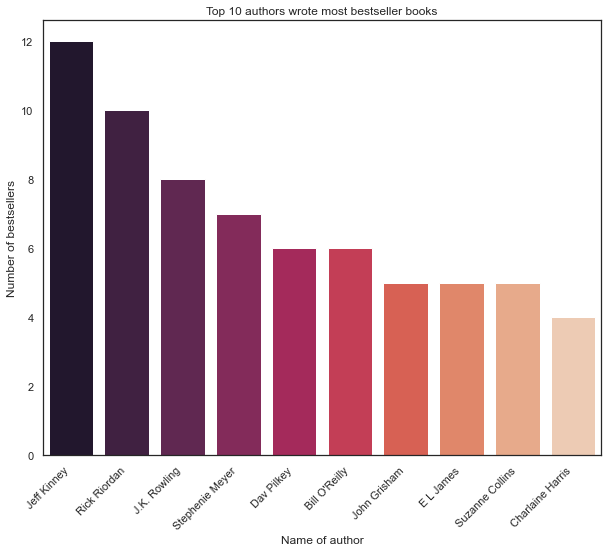

In [153]:
# Visualisation of top 10 authers with most written book
plt.figure(figsize=(10,8))
viz_5 = sns.barplot(x=number_of_book_written["Author"],
                    y=number_of_book_written["Name"],
                    palette="rocket")
viz_5.set_title("Top 10 authors wrote most bestseller books")
viz_5.set_ylabel("Number of bestsellers")
viz_5.set_xlabel("Name of author")
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=45, ha="right")
plt.show()

From the above visualisation, authors such as Jeff Kinney, Rick Riordan, J.K. Rowling and among others are those who wrote the most bestselling books at the time. They often offer something interesting to the audience to read. For example, the famous wizarding world of J.K. Rowling is still a popular fiction series over the world

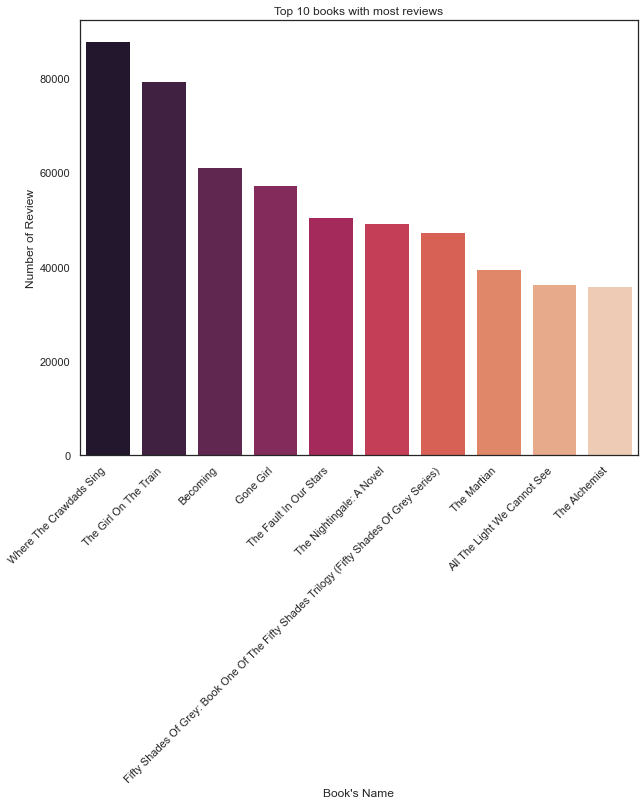

In [154]:
books_with_most_reviews = bestsellers_without_year.groupby("Name")[["Reviews"]].sum().sort_values("Reviews", ascending=False).head(10).reset_index()
plt.figure(figsize=(10,8))
viz_6 = sns.barplot(x=books_with_most_reviews["Name"],
                    y=books_with_most_reviews["Reviews"],
                    palette="rocket")
viz_6.set_title("Top 10 books with most reviews")
viz_6.set_ylabel("Number of Review")
viz_6.set_xlabel("Book's Name")
viz_6.set_xticklabels(viz_6.get_xticklabels(), rotation=45, ha="right")
plt.show()

From the visualisation those are 10 most reviewed books and it would definitely worth reading. Specially "The Fault in Our Stars" is worth that much as audience talk about it when the movie with the same name is premiered.

##### Insights with numerical data
In reviewing of the numerical data such as "Reviews", "User Rating" and "Price", those data values are not distributed normally and asymmetry presentation is observed.
* There are outliers in "User Rating" feature, where a small number of books receive a rating below 4.1 rating
* Also, outliers are appeared in "Reviews" feature, where a small number of books receiving reviews above 75 percentile.
* Lastly, some book that would cost higher than the average price, while others' price is at 0, which indicate that those books are either given for free or there is an inputting error. This is needed for further investigation.

<AxesSubplot:>

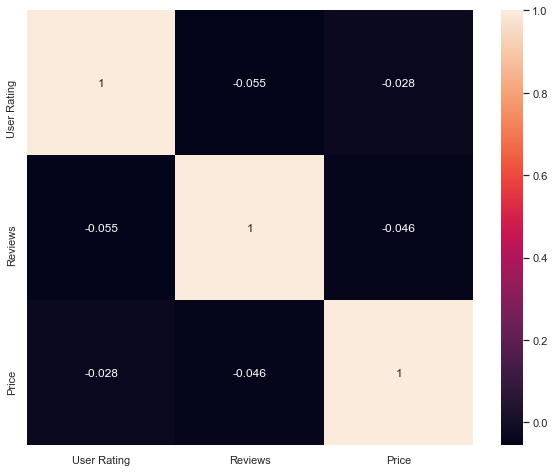

In [156]:
# While exploring the data, let's look at the correlation between data.
plt.figure(figsize=(10,8))
sns.heatmap(bestsellers_without_year.corr(), annot=True)

As from the heatmap visual, it is seen that the data does not contain any positive or negative linear relationship between those features.

However, as book's genre can somehow correlate with these features. Let's us examine the correlation with book's genre as well

In [157]:
# Before look at the correlation of book's genre. The feature is in categorical dtype
# It would need to be encoded before explore the correlation.
def Encode(dataset):
    for column in dataset.columns[dataset.columns.isin(["Genre"])]:
        dataset[column] = dataset[column].factorize()[0]
    return dataset

encoded_bestsellers = Encode(bestsellers_without_year.copy())
encoded_bestsellers.head()

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,1
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,0


<AxesSubplot:>

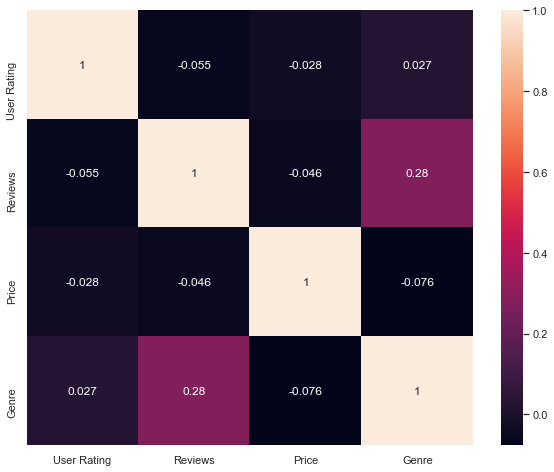

In [159]:
# Create a correlation heatmap for the encoded dataframe
plt.figure(figsize=(10,8))
sns.heatmap(encoded_bestsellers.corr(), annot=True)